In [3]:
import os
from fastai.vision.all import *
from fastai.text.all import *
from nbdev.showdoc import *

In [2]:
#!conda update -y -n base -c defaults conda
! pip install nbdev 
#!conda install -c pytorch -c fastai fastai 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 13.2 MB/s eta 0:00:00


In [4]:
path = Path("data")

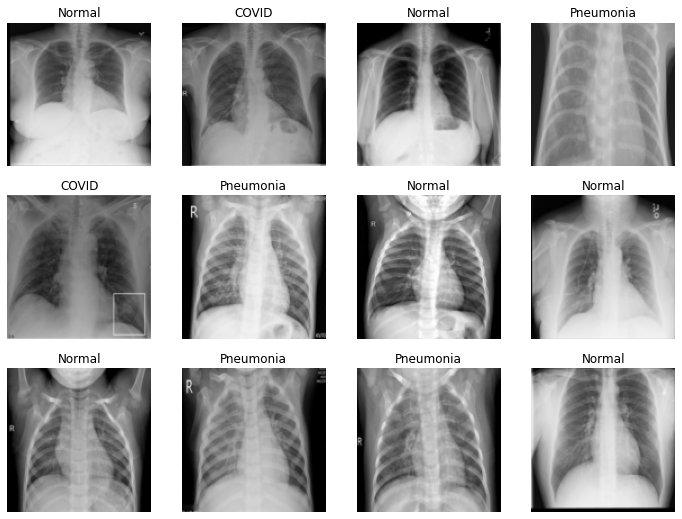

In [8]:
# Loads data using our plant data set
# Splits into training and validation set
detect = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
).dataloaders(path,bs=16)
# Shows the labeled plants
detect.show_batch(max_n=12)

In [9]:
from timeit import default_timer as timer 
def train_time(start: float, end: float):
    #Prints difference between start and end time.
    total_time = end - start
    print(f"Train time : {total_time:.2f} seconds")
    return total_time

In [14]:
#trying a different architecture
start_time = timer()

learn2 = vision_learner(detect,resnet34,lr=0.01,metrics=accuracy)
learn2.fine_tune(100)

end_time = timer()
#Print the the time taken

Time_Elapsed = train_time(start=start_time,end=end_time)

epoch,train_loss,valid_loss,accuracy,time
0,1.478448,1.245561,0.603175,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.694942,0.730170,0.682540,00:02
1,0.517245,0.633390,0.793651,00:02
2,0.386277,0.611796,0.746032,00:02
3,0.305890,0.547838,0.825397,00:02
4,0.247282,0.492208,0.825397,00:02
5,0.204648,0.459386,0.825397,00:02
6,0.161292,0.403145,0.857143,00:02
7,0.134865,0.424830,0.825397,00:02
8,0.104636,0.431124,0.857143,00:02
9,0.092345,0.561302,0.809524,00:03


Train time : 303.25 seconds


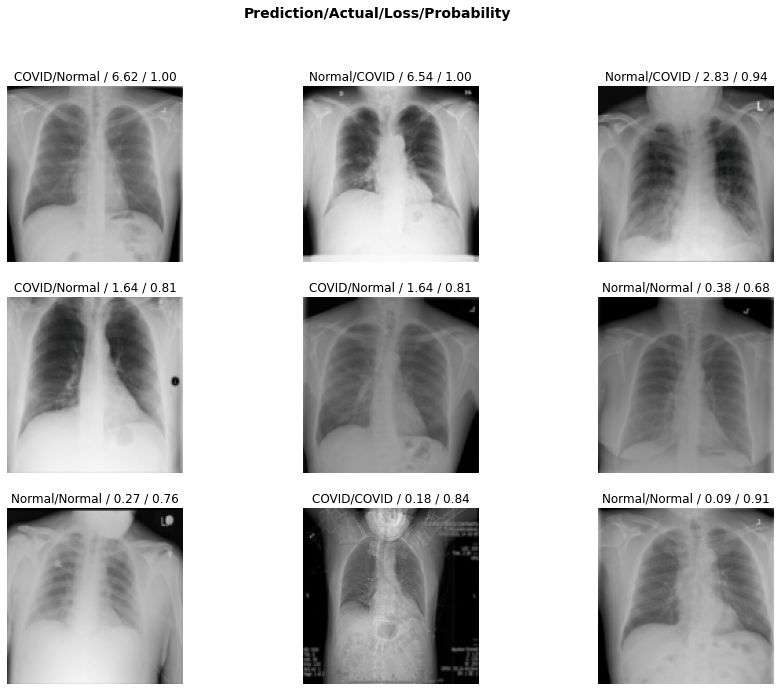

In [15]:
interpretation = ClassificationInterpretation.from_learner(learn2)

interpretation.plot_top_losses(9, figsize=(15,11))

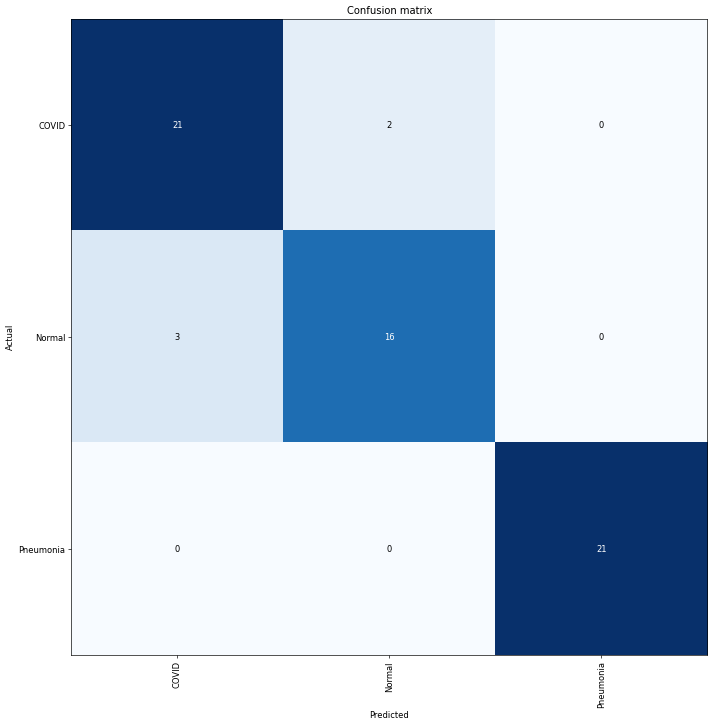

In [16]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
print("Accuracy: ", 1-float(learn2.recorder.metrics[0].value))
learn2.recorder.metrics[0].value

Accuracy:  0.079365074634552


TensorBase(0.9206)

In [19]:
import torch
x = torch.cuda.device(0)
y = torch.cuda.get_device_name(0)
print("Cuda availability: ",x,y)

Cuda availability:  <torch.cuda.device object at 0x7f11e64f12a0> NVIDIA GeForce GTX 1050 Ti


In [29]:
learn2.lr_find()

IndexError: index 0 is out of bounds for dimension 0 with size 0

In [28]:
learn2.recorder.plot_losses() 

AttributeError: 'Sequential' object has no attribute 'plot_losses'

In [30]:
learn2.show_results()

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.